In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df21 = pd.read_csv('../data/predictions_2021.csv')
df21.head()

,sofifa_id,name,overall_2020,predicted_overall_2021
0,158023,L. Messi,94,94.455997
1,20801,Cristiano Ronaldo,93,92.250445
2,190871,Neymar Jr,92,93.067969
3,183277,E. Hazard,91,91.645787
4,192985,K. De Bruyne,91,91.560027


In [3]:
df22 = pd.read_csv('../data/predictions_2022.csv')
df22.head()

,sofifa_id,name,overall_2020,predicted_overall_2022
0,158023,L. Messi,94,95.604565
1,20801,Cristiano Ronaldo,93,91.681438
2,190871,Neymar Jr,92,94.974208
3,183277,E. Hazard,91,92.948926
4,192985,K. De Bruyne,91,92.862711


In [4]:
merged = df21.merge(df22[['sofifa_id', 'predicted_overall_2022']], on='sofifa_id')
merged.head()

,sofifa_id,name,overall_2020,predicted_overall_2021,predicted_overall_2022
0,158023,L. Messi,94,94.455997,95.604565
1,20801,Cristiano Ronaldo,93,92.250445,91.681438
2,190871,Neymar Jr,92,93.067969,94.974208
3,183277,E. Hazard,91,91.645787,92.948926
4,192985,K. De Bruyne,91,91.560027,92.862711


In [5]:
df23 = pd.read_csv('../data/predictions_2023.csv')
df23.head()

,sofifa_id,name,club,overall_2020,predicted_overall_2023
0,158023,L. Messi,FC Barcelona,94,102.339826
1,20801,Cristiano Ronaldo,Juventus,93,95.956756
2,190871,Neymar Jr,Paris Saint-Germain,92,96.748913
3,183277,E. Hazard,Real Madrid,91,98.252710
4,192985,K. De Bruyne,Manchester City,91,96.355639


In [6]:
merged = merged.merge(df23[['sofifa_id', 'predicted_overall_2023', 'club']], on='sofifa_id')
merged.head()

,sofifa_id,name,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023,club
0,158023,L. Messi,94,94.455997,95.604565,102.339826,FC Barcelona
1,20801,Cristiano Ronaldo,93,92.250445,91.681438,95.956756,Juventus
2,190871,Neymar Jr,92,93.067969,94.974208,96.748913,Paris Saint-Germain
3,183277,E. Hazard,91,91.645787,92.948926,98.252710,Real Madrid
4,192985,K. De Bruyne,91,91.560027,92.862711,96.355639,Manchester City


In [7]:
merged = merged[['sofifa_id', 'name', 'club', 'overall_2020', 'predicted_overall_2021',
       'predicted_overall_2022', 'predicted_overall_2023']]

In [8]:
merged.head()

,sofifa_id,name,club,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023
0,158023,L. Messi,FC Barcelona,94,94.455997,95.604565,102.339826
1,20801,Cristiano Ronaldo,Juventus,93,92.250445,91.681438,95.956756
2,190871,Neymar Jr,Paris Saint-Germain,92,93.067969,94.974208,96.748913
3,183277,E. Hazard,Real Madrid,91,91.645787,92.948926,98.252710
4,192985,K. De Bruyne,Manchester City,91,91.560027,92.862711,96.355639


In [9]:
# Search database with player's name

name = input("Enter player's name: ")

merged[merged['name'].str.contains(name)]

Enter player's name: Hoever


,sofifa_id,name,club,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023
11844,246763,K. Hoever,Liverpool,62,65.338895,68.227155,71.020997


In [10]:
# Once located the player, introduce its id

player_id = int(input("Enter player's id: "))

Enter player's id: 246763


In [14]:
player = merged.groupby('sofifa_id', as_index=False).agg('mean')
player = player.loc[player['sofifa_id']==player_id]

player = player.T
player.columns = ['overalls']

player = player[1:]
player

,overalls
overall_2020,62.000000
predicted_overall_2021,65.338895
predicted_overall_2022,68.227155
predicted_overall_2023,71.020997


In [15]:
# +/- MAE values

#player['MAE_2021'] = 1.619
#player['MAE_2022'] = 2.405
#player['MAE_2023'] = 2.687

maes = [0, 1.619, 2.405, 2.687]
high = []
low = []

for i in range(len(player['overalls'])):
    high.append(player['overalls'][i]+maes[i])
    low.append(player['overalls'][i]-maes[i])
    
player['high'] = high
player['low'] = low

player

,overalls,high,low
overall_2020,62.000000,62.000000,62.000000
predicted_overall_2021,65.338895,66.957895,63.719895
predicted_overall_2022,68.227155,70.632155,65.822155
predicted_overall_2023,71.020997,73.707997,68.333997


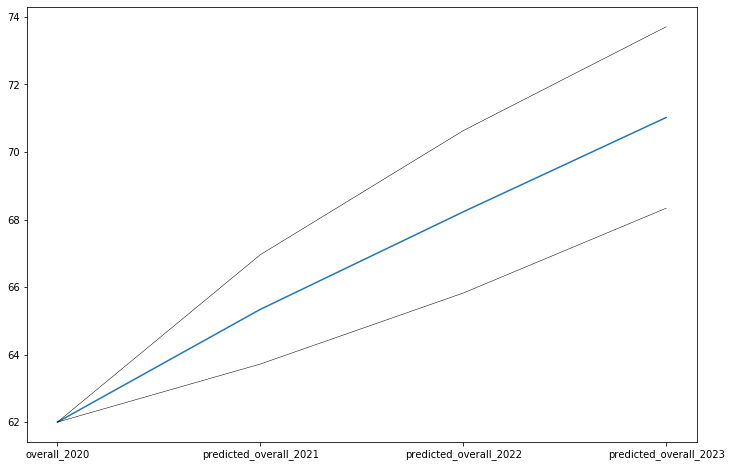

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(data=player['overalls'])
sns.lineplot(data=player['high'], color = 'k', linewidth=0.5)
sns.lineplot(data=player['low'], color='k', linewidth=0.5)
plt.show()